Contingency Table:
Length    Short  Medium  Long
Protocol                     
FTP          24       0     0
FTP-DATA      3    2989   546
TCP        2399      26    10

Chi-square test results:
Chi-square statistic: 5837.49
p-value: 0.0000


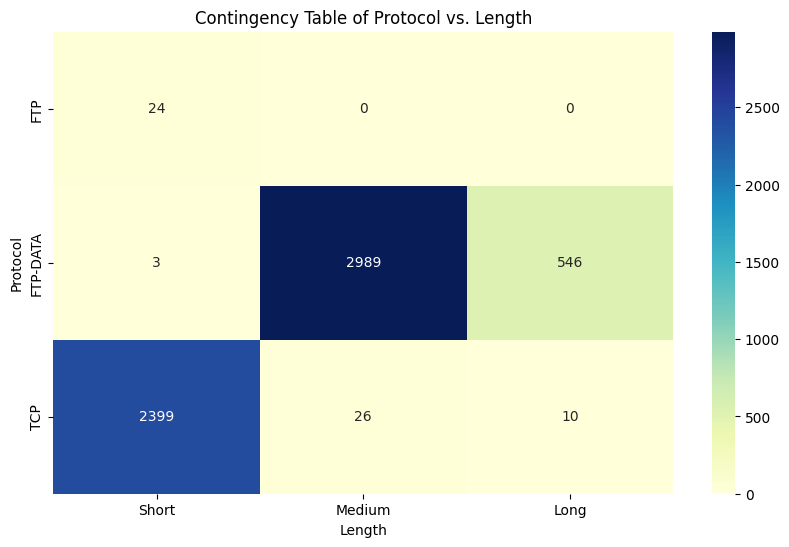

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the network traffic data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv', sep=',')

# Group the "Length" values into categories for analysis
data['Length'] = pd.cut(data['Length'], bins=[0, 1000, 5000, float('inf')], labels=['Short', 'Medium', 'Long'])

# Create a contingency table for protocol vs length
contingency_table = pd.crosstab(data['Protocol'], data['Length'])

# Perform chi-square test for protocol vs length
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

# Plotting the contingency table as a heatmap graph
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table of Protocol vs. Length')
plt.xlabel('Length')
plt.ylabel('Protocol')
plt.show()